# <a id='toc1_'></a>[**Waze_Exploratory_Data_Analysis**](#toc0_)
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

**Table of contents**<a id='toc0_'></a>    
- [**Waze_Exploratory_Data_Analysis**](#toc1_)    
  - [**Scenario**](#toc1_1_)    
    - [**Email from Chidi Ga, Senior Data Analyst**](#toc1_1_1_)    
    - [**Email from Harriet Hadzic, Director of Data Analysis**](#toc1_1_2_)    
    - [**Data Dictionary**](#toc1_1_3_)    
    - [**Objectives**](#toc1_1_4_)    
  - [**PACE Stages**](#toc1_2_)    
  - [**PACE:Plan**](#toc1_3_)    
    - [**Task 1. Imports and data loading**](#toc1_3_1_)    
  - [**PACE: Analyze**](#toc1_4_)    
    - [**Task 2. Data exploration and cleaning**](#toc1_4_1_)    
      - [**Data overview and summary statistics**](#toc1_4_1_1_)    
  - [**PACE: Construct**](#toc1_5_)    
    - [**Task 3a. Visualizations**](#toc1_5_1_)    
      - [**`sessions`**](#toc1_5_1_1_)    
      - [**`drives`**](#toc1_5_1_2_)    
        - [**Helper function**](#toc1_5_1_2_1_)    
      - [**`total_sessions`**](#toc1_5_1_3_)    
      - [**`n_days_after_onboarding`**](#toc1_5_1_4_)    
      - [**`driven_km_drives`**](#toc1_5_1_5_)    
      - [**`duration_minutes_drives`**](#toc1_5_1_6_)    
      - [**`activity_days`**](#toc1_5_1_7_)    
      - [**`driving_days`**](#toc1_5_1_8_)    
      - [**`device`**](#toc1_5_1_9_)    
      - [**`label`**](#toc1_5_1_10_)    
      - [**`driving_days` vs. `activity_days`**](#toc1_5_1_11_)    
      - [**Retention by device**](#toc1_5_1_12_)    
      - [**Retention by kilometers driven per driving day**](#toc1_5_1_13_)    
      - [**Churn rate per number of driving days**](#toc1_5_1_14_)    
      - [**Proportion of sessions that occurred in the last month**](#toc1_5_1_15_)    
    - [**Task 3b. Handling outliers**](#toc1_5_2_)    
      - [**Conclusion**](#toc1_5_2_1_)    
  - [**PACE: Execute**](#toc1_6_)    
    - [**Task 4a. Results and evaluation**](#toc1_6_1_)    
    - [**Task 4b. Conclusion**](#toc1_6_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[**Scenario**](#toc0_)

Your team is making progress on their project to develop a machine learning model to predict user churn. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with Exploratory Data Analysis (EDA) and further data visualization. You also notice a follow-up email from the Director of Data Analysis, Harriet Hadzic. Harriet suggests including an executive summary of your analysis to share with teammates. 

### <a id='toc1_1_1_'></a>[**Email from Chidi Ga, Senior Data Analyst**](#toc0_)

**Subject:** EDA & Data Viz

**From:** "Chidi Ga," Chidi@waze

**Cc:** "May Santner," May@waze, "Harriet Hadzic," Harriet@waze

Hi there,

Thanks for the amazing work you've done so far.

We're ready to perform EDA on our user data. Has May told you what the leadership team expects when it comes to EDA? If not, think of it as a "show your work" kind of report.
They will want to see a Python notebook showing the structuring and cleaning you did, and any data visualizations you created to better understand the data. To start, I suggest
you create a box plot of the variable "drives," and a scatter plot of the variables "drives" and "sessions." Feel free to add any other visuals you think are useful.

By the way, I cc'd our director, Harriet Hadzic, who is on the leadership team and will be reviewing our analysis. @Harriet, I want to keep you informed on our progress!

Thanks!

Chidi Ga

Senior Data Analyst

Waze

### <a id='toc1_1_2_'></a>[**Email from Harriet Hadzic, Director of Data Analysis**](#toc0_)

**Subject:** RE: EDA & Data Viz

**From:** "Harriet Hadzic," Harriet@waze

**Cc:** "May Santner," May@waze, "Chidi Ga," Chidi@waze

Thanks for the update, Chidi!

Welcome to the team. We're so glad to have you.

Along with the notebook, it would be really helpful if you included an executive summary of your analysis attached via email.

I appreciate your help!

Harriet Hadzic

Director of Data Analysis

Waze

### <a id='toc1_1_3_'></a>[**Data Dictionary**](#toc0_)

**Waze dataset overview**

This project uses a dataset called `waze_dataset.csv`. It contains synthetic data created for this project in partnership with Waze. Examine each data variable gathered.

This dataset contains:

**14,999 rows** - each row represents one unique user

**13 columns**

| Column name                 | Type  | Description                                                                 |
|----------------------------|-------|-----------------------------------------------------------------------------|
| ID                         | int   | A sequential numbered index                                                 |
| label                      | obj   | Binary target variable (“retained” vs “churned”) indicating user churn status during the month |
| sessions                   | int   | Number of times a user opened the app during the month                      |
| drives                     | int   | Number of occurrences where a user drove at least 1 km during the month    |
| device                     | obj   | Type of device used to start a session (e.g., Android or iPhone)            |
| total_sessions             | float | Model-estimated total number of sessions since the user onboarded           |
| n_days_after_onboarding    | int   | Number of days since the user signed up for the app                          |
| total_navigations_fav1     | int   | Total navigations since onboarding to the user’s favorite location 1        |
| total_navigations_fav2     | int   | Total navigations since onboarding to the user’s favorite location 2        |
| driven_km_drives           | float | Total kilometers driven during the month                                    |
| duration_minutes_drives    | float | Total duration driven (in minutes) during the month                         |
| activity_days              | int   | Number of days the user opened the app during the month                     |
| driving_days               | int   | Number of days the user drove at least 1 km during the month                |


### <a id='toc1_1_4_'></a>[**Objectives**](#toc0_)

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous course, adding relevant visulisations that help communicate the story that the data tells.

## <a id='toc1_2_'></a>[**PACE Stages**](#toc0_)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## <a id='toc1_3_'></a>[**PACE:Plan**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### <a id='toc1_3_1_'></a>[**Task 1. Imports and data loading**](#toc0_)

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data and store it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

## <a id='toc1_4_'></a>[**PACE: Analyze**](#toc0_)

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?

**Answer:**
1. The data is already in a structured format, with each row representing each user.
2. Yes the `label` variable has 700 missing rows.

### <a id='toc1_4_1_'></a>[**Task 2. Data exploration and cleaning**](#toc0_)

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







**Answer:**
1. The data columns that are most applicable are the target variable `label` and the driving metrics variables.
2. The data columns that I can remove are `ID` and `total_navigations_fav1/2` as they do not meaningfully describe the current month engagement patterns which are more relevant for understanding and predicting user churn.
3. I would look at the `.info` results and see if any variables have missing data such is the case with `label`, and would see if the data is missing completely at random, and then proceed with the analysis by removing the rows with missing values. If the data is not missing completely at random then I would investigate the root cause of the missingness and ensure it would not interfere with the statistical inference and the modelling.
4. I would use the Interquartile Range method using a boxplot to visualise the outliers and in terms of dealing with them, I would either leave them alone after an extensive investigation or I would remove or reassign them.

#### <a id='toc1_4_1_1_'></a>[**Data overview and summary statistics**](#toc0_)

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [5]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## <a id='toc1_5_'></a>[**PACE: Construct**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

**Answer:**
1. One way to identify outliers is with the Interquartile Range method, where the outliers can be seperated and investigated. Other ways include using a boxplot to visualise the distribution of the data and using the numpy funcitons (`.mean()` and `.median()`) to investigate the mean and median of the data and understand its range of data values.
2. There are three main options for dealing with outliers, which are to either keep them, delete them or reassogn them and this is made on a dataset by dataset basis according to the overal project goals. A general guidline is that if you are to delete them, you are certain that the outliers are mistakes, typos or errors or the dataset is going to be used for modelling or machine learning, then you are more likely to decide to delete them. The guidlines for reassigning outliers are that if the dataset is small and/or the data will be used for modelling or machine learning, then you are more likely to derive new values in order to replace the outlier values. With regards to the final option, that of leaving the outliers alone, the guidlines are that for a dataset that you plan to do EDA/analysis on and nothing else or for a dataset that is going to be used by a Model that is resistant to outliers, it is most likely that you are going to leave them.

### <a id='toc1_5_1_'></a>[**Task 3a. Visualizations**](#toc0_)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



**Answer:**
Box plot, histogram, scatter plot and bar charts

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### <a id='toc1_5_1_1_'></a>[**`sessions`**](#toc0_)

_The number of occurrence of a user opening the app during the month_

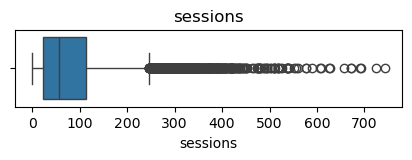

In [7]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'])
plt.title("sessions")
plt.show()

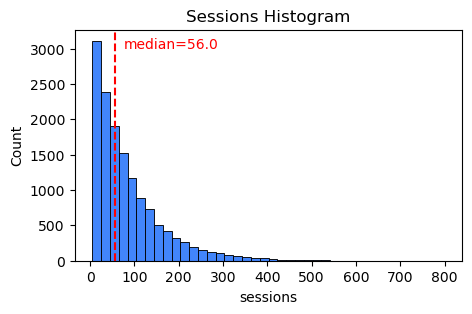

In [19]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'], binrange=(5,800), binwidth=20, color='#4285FA', alpha=1)
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,3000, f'median={median}', color='red')
plt.title("Sessions Histogram")
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### <a id='toc1_5_1_2_'></a>[**`drives`**](#toc0_)

_An occurrence of driving at least 1 km during the month_

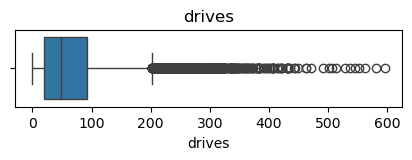

In [20]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'])
plt.title("drives")
plt.show()

##### <a id='toc1_5_1_2_1_'></a>[**Helper function**](#toc0_)

In [30]:
def histogram(col_str, median_txt=True, **kwargs):
    """
    To compute histograms

    Parameters:
    col_str = column name as a string
    median_txt = Whether to include the median text in the plot
    **kwargs = Any keyword arguments from the sns.histplot() function
    """
    median=df[col_str].median()
    plt.figure(figsize=(5,3))
    ax=sns.histplot(x=df[col_str], **kwargs)
    plt.axvline(median, color='red', linestyle='--')
    if median_txt==True:
        plt.text(0.25, 0.85, f'median={median}', color='red', ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f"{col_str} Histogram")

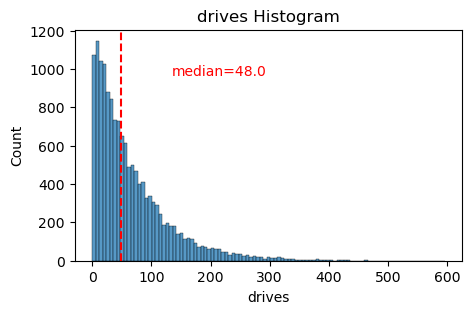

In [31]:
# Histogram
histogram('drives')

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### <a id='toc1_5_1_3_'></a>[**`total_sessions`**](#toc0_)

_A model estimate of the total number of sessions since a user has onboarded_

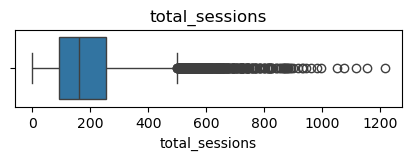

In [32]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'])
plt.title("total_sessions")
plt.show()

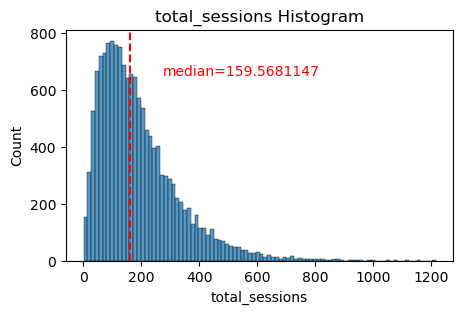

In [33]:
# Histogram
histogram('total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### <a id='toc1_5_1_4_'></a>[**`n_days_after_onboarding`**](#toc0_)

_The number of days since a user signed up for the app_

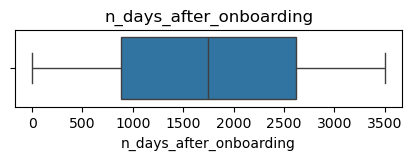

In [34]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'])
plt.title("n_days_after_onboarding")
plt.show()

Median: 1741.0


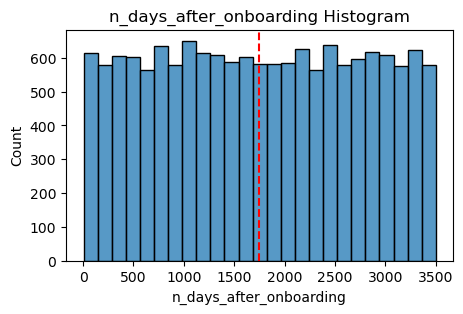

In [35]:
# Histogram
histogram('n_days_after_onboarding', median_txt=False)

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### <a id='toc1_5_1_5_'></a>[**`driven_km_drives`**](#toc0_)

_Total kilometers driven during the month_

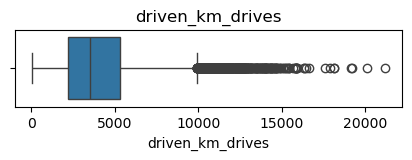

In [36]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'])
plt.title("driven_km_drives")
plt.show()

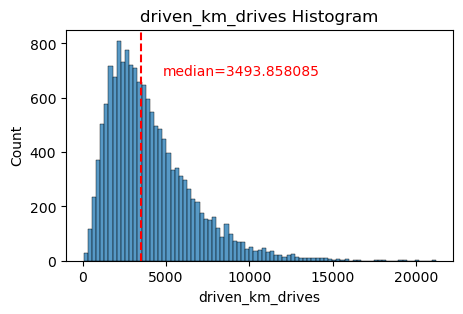

In [37]:
# Histogram
histogram('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### <a id='toc1_5_1_6_'></a>[**`duration_minutes_drives`**](#toc0_)

_Total duration driven in minutes during the month_

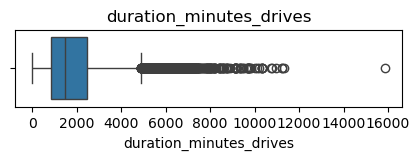

In [38]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'])
plt.title("duration_minutes_drives")
plt.show()

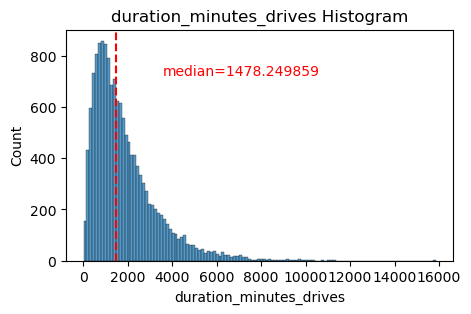

In [39]:
histogram('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### <a id='toc1_5_1_7_'></a>[**`activity_days`**](#toc0_)

_Number of days the user opens the app during the month_

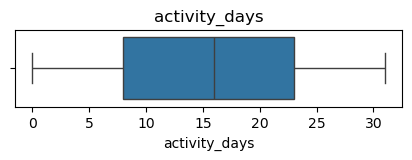

In [40]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'])
plt.title("activity_days")
plt.show()

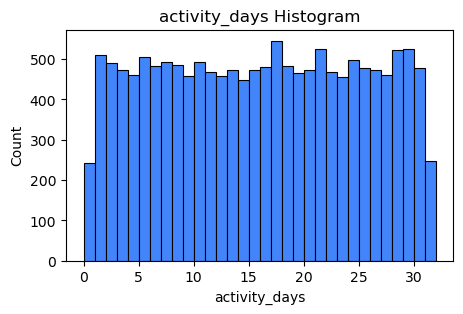

In [43]:
# Histogram
plt.figure(figsize=(5,3))
ax = sns.histplot(x=df['activity_days'], binrange=(0,32), binwidth=1, color='#4285FA', alpha=1)
ax.set_xticks(range(0,33,5))
plt.title("activity_days Histogram")
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### <a id='toc1_5_1_8_'></a>[**`driving_days`**](#toc0_)

_Number of days the user drives (at least 1 km) during the month_

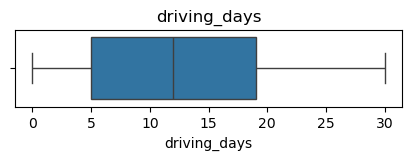

In [44]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'])
plt.title("driving_days")
plt.show()

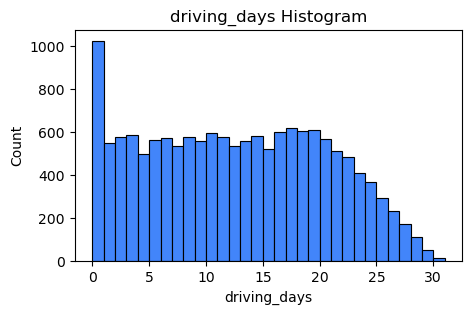

In [45]:
# Histogram
plt.figure(figsize=(5,3))
ax = sns.histplot(x=df['driving_days'], binrange=(0,31), binwidth=1, color='#4285FA', alpha=1)
ax.set_xticks(range(0,32,5))
plt.title("driving_days Histogram")
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### <a id='toc1_5_1_9_'></a>[**`device`**](#toc0_)

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

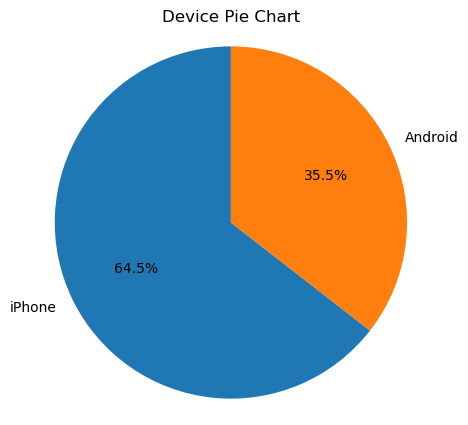

In [46]:
# Pie chart
plt.figure(figsize=(5,5))
device_count = df['device'].value_counts()
plt.pie(device_count, labels=device_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Device Pie Chart")
plt.axis('equal')
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### <a id='toc1_5_1_10_'></a>[**`label`**](#toc0_)

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

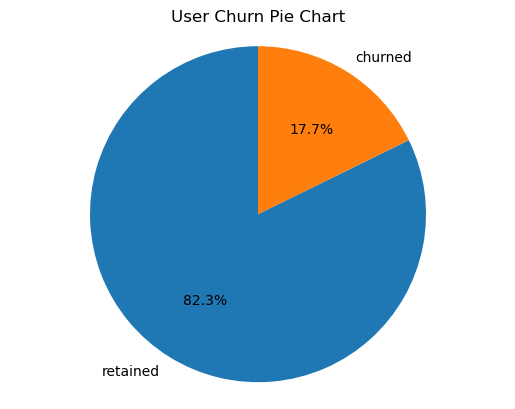

In [47]:
# Pie chart
label_count = df['label'].value_counts()
plt.Figure(figsize=(5,5))
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%', startangle=90)
plt.title("User Churn Pie Chart")
plt.axis('equal')
plt.show()

Less than 18% of the users churned.

#### <a id='toc1_5_1_11_'></a>[**`driving_days` vs. `activity_days`**](#toc0_)

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

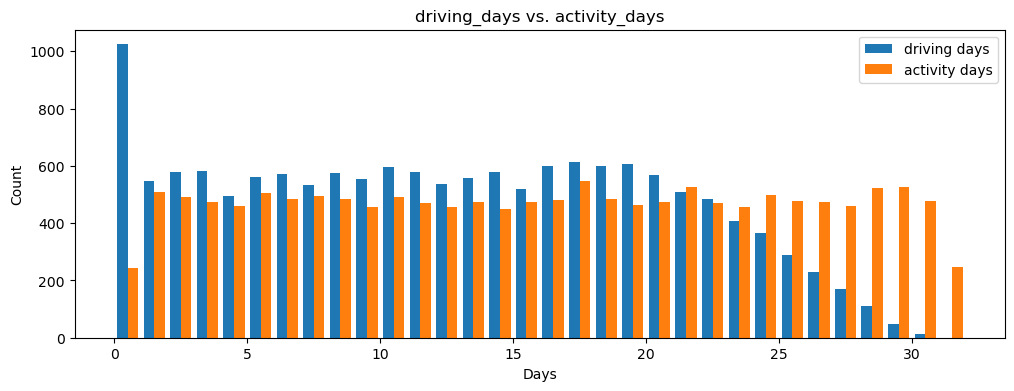

In [49]:
# Histogram
plt.figure(figsize=(12,4))
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=['driving days', 'activity days'])
plt.xlabel("Days")
plt.ylabel("Count")
plt.title("driving_days vs. activity_days")
plt.legend()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [50]:
print(f"driving_days number of days = {df['driving_days'].max()}")
print()
print(f"activity_days number of driving days = {df['activity_days'].max()}")

driving_days number of days = 30

activity_days number of driving days = 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

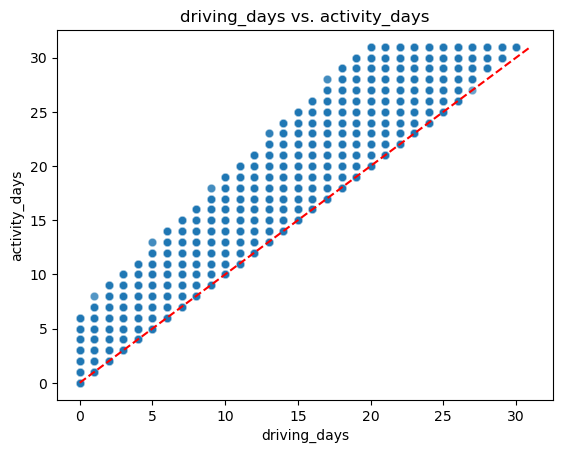

In [51]:
# Scatter plot
plt.Figure(figsize=(5,3))
sns.scatterplot(data=df, x='driving_days', y='activity_days', alpha=0.3)
plt.plot([0,31], [0,31], color='red', linestyle='--')
plt.title("driving_days vs. activity_days")
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### <a id='toc1_5_1_12_'></a>[**Retention by device**](#toc0_)

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

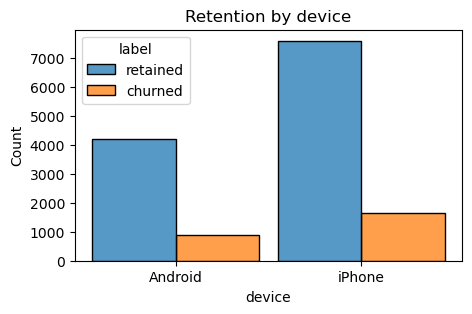

In [55]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='device', hue='label', multiple='dodge', shrink=0.9)
plt.title("Retention by device")
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### <a id='toc1_5_1_13_'></a>[**Retention by kilometers driven per driving day**](#toc0_)

In the previous course, you discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [56]:
# 1. Create `km_per_driving_day` column

df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [57]:
# 1. Convert infinite values to zero
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

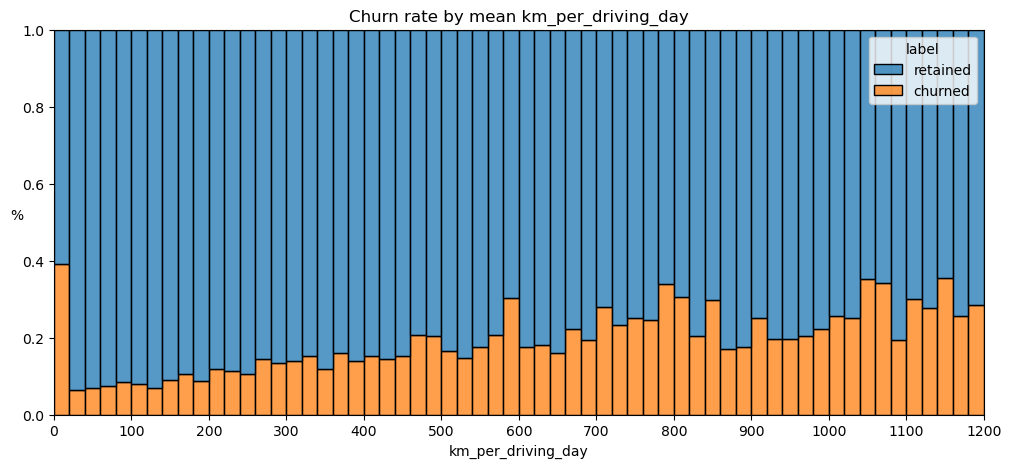

In [67]:
# Histogram
plt.figure(figsize=(12,5))
ax = sns.histplot(x=df['km_per_driving_day'], binrange=(0,1200), binwidth=20, hue=df['label'], multiple='fill')
ax.set_xticks(range(0,1201, 100))
plt.ylabel('%', rotation=0)
plt.title("Churn rate by mean km_per_driving_day")
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### <a id='toc1_5_1_14_'></a>[**Churn rate per number of driving days**](#toc0_)

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

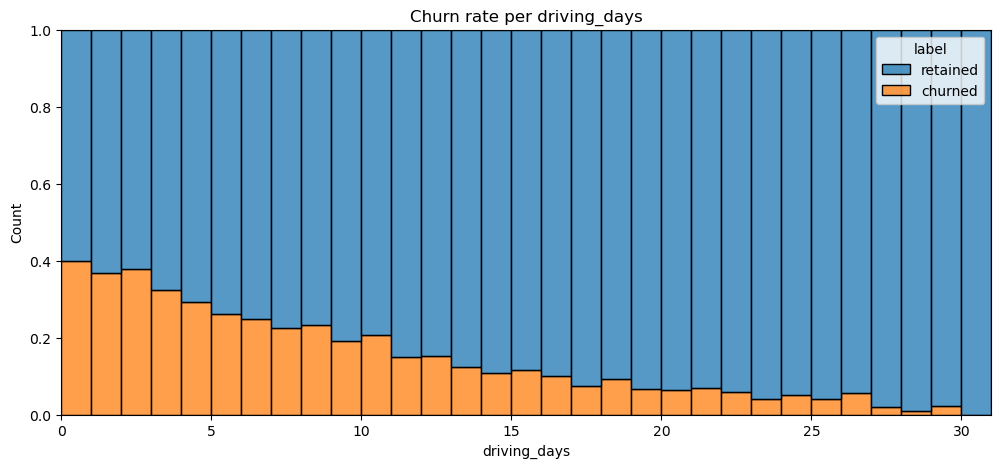

In [68]:
# Histogram
plt.figure(figsize=(12,5))
ax = sns.histplot(x=df['driving_days'], binrange=(0,31), binwidth=1, hue=df['label'], multiple='fill')
ax.set_xticks(range(0,32, 5))
plt.title("Churn rate per driving_days")
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### <a id='toc1_5_1_15_'></a>[**Proportion of sessions that occurred in the last month**](#toc0_)

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [69]:
df['percent_sessions_in_last_month'] = (df['sessions'] / df['total_sessions']) * 100

What is the median value of the new column?

In [70]:
df['percent_sessions_in_last_month'].median()

42.30970299276318

Now, create a histogram depicting the distribution of values in this new column.

Median: 42.30970299276318


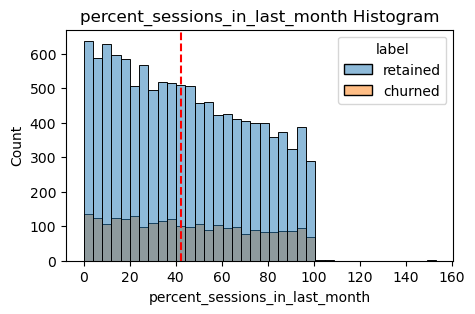

In [74]:
# Histogram
histogram('percent_sessions_in_last_month', median_txt=False, hue=df['label'], multiple='layer')

Check the median value of the `n_days_after_onboarding` variable.

In [75]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

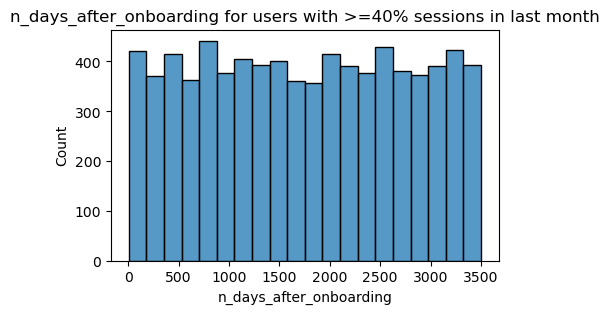

In [80]:
# Histogram
df_40 = df.loc[df['percent_sessions_in_last_month']>=40]
plt.figure(figsize=(5,3))
ax = sns.histplot(data=df_40, x='n_days_after_onboarding')
plt.title('n_days_after_onboarding for users with >=40% sessions in last month')
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### <a id='toc1_5_2_'></a>[**Task 3b. Handling outliers**](#toc0_)

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [81]:
def outlier(variable, percentile):
    """
    Computes the percentile of a given column
    """
    threshold = df[variable].quantile(percentile)
    df.loc[df[variable] > threshold, variable] = threshold
    print('{:>25} | percentile: {} | threshold {}'.format(variable, percentile, threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [82]:
for variable in ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']:
    outlier(variable, 0.95)

                 sessions | percentile: 0.95 | threshold 243.0
                   drives | percentile: 0.95 | threshold 201.0
           total_sessions | percentile: 0.95 | threshold 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold 4668.899348999998


Call `describe()` to see if your change worked.

In [83]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,44.925534
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,28.691863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,19.622145
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,42.309703
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,68.721626
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,153.063707


#### <a id='toc1_5_2_1_'></a>[**Conclusion**](#toc0_)

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

## <a id='toc1_6_'></a>[**PACE: Execute**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### <a id='toc1_6_1_'></a>[**Task 4a. Results and evaluation**](#toc0_)

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



**Answer:**

I have learned .... that the user churn rate is 17% while the retention rate is just over 80%. I have also learned that the churn rate increases as the km driven by the user increases but the churn rate decreases as the amount of days the user uses Waze increases.

My other questions are .... 

* Why was there so many users who did not drive at all during the month?
* Who are the users who have an extreme amount of number of drives, are these commercial or ridesharing app drivers?
* What is the user demographic of the retained and churned users?

My client would likely want to know ... what are the key variables associated with user churn? And how can we implement policies to reduce user churn?

Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

In [84]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [85]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,95.367025,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,40.685648,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,84.118609,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,72.496767,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,49.926590,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,40.422911,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,1.267292,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,22.149923,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,31.057251,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,34.313429,0.809524


### <a id='toc1_6_2_'></a>[**Task 4b. Conclusion**](#toc0_)

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4. What percentage of users churned and what percentage were retained?

5. What factors correlated with user churn? How?

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


**Answer:**
1. A majority of the continous usage variables such as `sessions` and `drives` exhibited right-skewed distributions with long tails. This therefore indicates that while most of the users engage at relatively low to moderate levels, a small subset of users shows extremely high activity. These patterns suggest heterogeneous user behaviour and justify the use of medians and percentile-based methods instead of means.
2. The data did not appear errorneous overall, but some values were physically implausable such as the extremely high `km_per_driving_day`, indicating outliers rather than data entry errors. Additionally, infinite values arose from division by zero when users had zero driving days, but this was a calculational artifact that required cleaning rather than a flaw in the raw data.
3. It would be insightful to understand whether high-intensity users represent a distinct segment such as professional or commercial drivers and whether user churn should be modelled differently for them. Other additional questions for the Waze team include how the trip purpose, geographic context or navigation success affects user churn and whether engagement patterns change prior to churn events.
4. The dataset shows that 17.7% of users churned while 82.3% of users retained, this shows a possible class imbalance which is important to take into account during the downstream modelling process.
5. User churn was correlated with more intense but less consistent usage patterns, with churned users tending to drive further per driving day but used the app on fewer days overall. In contrast, the retained users showed more regular engagement across the month, thereby suggesting that the consistency of usage, rather than the sheer intensity is more strongly associated with retention.
6. Yes the newer users did have a greater representation in the dataset as evident in the distribution of `n_days_after_onboarding` being right-skewed, with a higher concentration of users having fewer days since onboarding. This therefore indicates that newer users are more prevalent in the dataset, which may influence churn rates and should be considered when interpreting results or building models.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.